In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import re

In [2]:
df = pd.read_csv('./data/old_population.csv')

In [3]:
# 주소=군+읍/면+리 병합
df = df.loc[:, ['연도', '읍/면', '리', '전체인구수', '60세이상노인인구수']]
df['주소'] = '부여군 ' + df['읍/면'] + ' ' + df['리']
df_addr = df[['주소']]
df_addr.head()

,주소
0,부여군 구룡면 구봉1리
1,부여군 구룡면 구봉2리
2,부여군 구룡면 구봉3리
3,부여군 구룡면 죽절리
4,부여군 구룡면 주정1리


In [4]:
# 카카오맵 API
API_KEY = 'c8d2487b6ee1ee531c4b6899126efe7f'
headers = {'Authorization' : 'KakaoAK '+API_KEY}
headers

{'Authorization': 'KakaoAK c8d2487b6ee1ee531c4b6899126efe7f'}

In [5]:
# 위도 및 경도를 가져오는 함수
def getLat(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    result = json.loads(str(requests.get(url, headers=headers).text))
    if len(result['documents']) == 0:
        new_addr = re.sub(r'[0-9]+', '', addr)
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + new_addr
        result = json.loads(str(requests.get(url, headers=headers).text))

    match_first = result['documents'][0]['address']

    return float(match_first['y'])

def getLng(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    result = json.loads(str(requests.get(url, headers=headers).text))
    if len(result['documents']) == 0:
        new_addr = re.sub(r'[0-9]+', '', addr)
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + new_addr
        result = json.loads(str(requests.get(url, headers=headers).text))
        
    match_first = result['documents'][0]['address']
    return float(match_first['x'])

In [34]:
# 주소를 위도 경도로 변환
for i in range(len(df)):
    try:
        lng = getLng(df_addr['주소'][i])
        lat = getLat(df_addr['주소'][i])
        df_addr.loc[i,['경도']] = lng
        df_addr.loc[i,['위도']] = lat

    except:
        print('error',i)
        
    
    if i%100 == 0:
        print('{} 번째 주소에 대한 좌표정보 불러오는 중...'.format(i)) 

0 번째 주소에 대한 좌표정보 불러오는 중...
100 번째 주소에 대한 좌표정보 불러오는 중...
200 번째 주소에 대한 좌표정보 불러오는 중...
300 번째 주소에 대한 좌표정보 불러오는 중...
400 번째 주소에 대한 좌표정보 불러오는 중...
500 번째 주소에 대한 좌표정보 불러오는 중...
600 번째 주소에 대한 좌표정보 불러오는 중...
700 번째 주소에 대한 좌표정보 불러오는 중...
800 번째 주소에 대한 좌표정보 불러오는 중...
error 817
900 번째 주소에 대한 좌표정보 불러오는 중...
1000 번째 주소에 대한 좌표정보 불러오는 중...
1100 번째 주소에 대한 좌표정보 불러오는 중...
1200 번째 주소에 대한 좌표정보 불러오는 중...
1300 번째 주소에 대한 좌표정보 불러오는 중...
error 1356
1400 번째 주소에 대한 좌표정보 불러오는 중...
1500 번째 주소에 대한 좌표정보 불러오는 중...
1600 번째 주소에 대한 좌표정보 불러오는 중...
1700 번째 주소에 대한 좌표정보 불러오는 중...
1800 번째 주소에 대한 좌표정보 불러오는 중...
1900 번째 주소에 대한 좌표정보 불러오는 중...
2000 번째 주소에 대한 좌표정보 불러오는 중...
2100 번째 주소에 대한 좌표정보 불러오는 중...
2200 번째 주소에 대한 좌표정보 불러오는 중...
2300 번째 주소에 대한 좌표정보 불러오는 중...
2400 번째 주소에 대한 좌표정보 불러오는 중...
2500 번째 주소에 대한 좌표정보 불러오는 중...
2600 번째 주소에 대한 좌표정보 불러오는 중...
2700 번째 주소에 대한 좌표정보 불러오는 중...
2800 번째 주소에 대한 좌표정보 불러오는 중...
2900 번째 주소에 대한 좌표정보 불러오는 중...
3000 번째 주소에 대한 좌표정보 불러오는 중...
3100 번째 주소에 대한 좌표정보 불러오는 중...
3200 번째 주소에 대한 좌표정보 불러오는 중...
3

In [41]:
# 에러난 주소 체크
df_addr.iloc[1356]

주소    부여군 부여읍 가증1리
경도      126.946247
위도       36.302555
Name: 1356, dtype: object

In [40]:
# 주소 수정 후 재검색
lng = getLng('부여군 부여읍 가증리')
lat = getLat('부여군 부여읍 가증리')
df_addr.loc[1356,['경도']] = lng
df_addr.loc[1356,['위도']] = lat

In [42]:
# 계산된 경도 위도 저장
df['경도'] = df_addr['경도']
df['위도'] = df_addr['위도']

In [51]:
df.head()

,연도,읍/면,리,전체인구수,60세이상노인인구수,주소,경도,위도
0,2022,구룡면,구봉1리,110,65,부여군 구룡면 구봉1리,126.839518,36.261862
1,2022,구룡면,구봉2리,49,26,부여군 구룡면 구봉2리,126.839508,36.261593
2,2022,구룡면,구봉3리,52,33,부여군 구룡면 구봉3리,126.839729,36.261491
3,2022,구룡면,죽절리,186,101,부여군 구룡면 죽절리,126.820220,36.265256
4,2022,구룡면,주정1리,89,49,부여군 구룡면 주정1리,126.821951,36.253615


In [53]:
# 전체인구수 대비 노인인구수 계산
df['60세이상노인비율'] = df['60세이상노인인구수'] / df['전체인구수']

In [155]:
df.head()

,연도,경도,위도,60세이상노인비율,전체인구수,60세이상노인인구수
0,2022,126.839518,36.261862,0.590909,110,65
1,2022,126.839507,36.261593,0.530612,49,26
2,2022,126.839729,36.261491,0.634615,52,33
3,2022,126.820220,36.265256,0.543011,186,101
4,2022,126.821951,36.253615,0.550562,89,49


In [156]:
# 부여전체인구 대비 인구수 비율 계산
# 부여전체노인인구 대비 노인인구수 비율 계산
df['인구수비율'] = df['전체인구수'].div(df.groupby('연도')['전체인구수'].transform('sum'))
df['60세이상노인인구수비율'] = df['60세이상노인인구수'].div(df.groupby('연도')['60세이상노인인구수'].transform('sum'))

In [157]:
df.head()

,연도,경도,위도,60세이상노인비율,전체인구수,60세이상노인인구수,인구수비율,60세이상노인인구수비율
0,2022,126.839518,36.261862,0.590909,110,65,0.001782,0.002111
1,2022,126.839507,36.261593,0.530612,49,26,0.000794,0.000844
2,2022,126.839729,36.261491,0.634615,52,33,0.000842,0.001072
3,2022,126.820220,36.265256,0.543011,186,101,0.003013,0.003280
4,2022,126.821951,36.253615,0.550562,89,49,0.001442,0.001591


In [158]:
df = df.loc[:, ['연도', '경도', '위도', '인구수비율', '60세이상노인인구수비율']]

In [159]:
# 부여 동서남북 가장 끝 좌표
LOWER = 36.0721
LEFT = 126.6796
UPPER = 36.3865
RIGHT = 127.07

In [160]:
# 위도, 경도 15, 15 좌표계로 변환
df['x'] = df['경도'].astype(float).map(lambda x: np.trunc((x - LEFT) / ((RIGHT - LEFT) / 15.)))
df['y'] = df['위도'].astype(float).map(lambda x: np.trunc((x - LOWER) / ((UPPER - LOWER) / 15.)))

In [161]:
df.head()

,연도,경도,위도,인구수비율,60세이상노인인구수비율,x,y
0,2022,126.839518,36.261862,0.001782,0.002111,6.0,9.0
1,2022,126.839507,36.261593,0.000794,0.000844,6.0,9.0
2,2022,126.839729,36.261491,0.000842,0.001072,6.0,9.0
3,2022,126.820220,36.265256,0.003013,0.003280,5.0,9.0
4,2022,126.821951,36.253615,0.001442,0.001591,5.0,8.0


In [162]:
# 필요한 컬럼 선별
df = df.loc[:, ['연도', 'x', 'y', '인구수비율', '60세이상노인인구수비율']]

In [164]:
# 좌표별 인구수 비율 합과 노인인구비율 평균 계산
pop_rate = df.loc[:, ['연도', 'x', 'y', '인구수비율']].groupby(['연도', 'x', 'y']).sum()
old_pop_rate = df.loc[:, ['연도', 'x', 'y', '60세이상노인인구수비율']].groupby(['연도', 'x', 'y']).sum()
df_preprocessed = pop_rate.join(old_pop_rate)

In [165]:
df = df_preprocessed.reset_index()

In [137]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

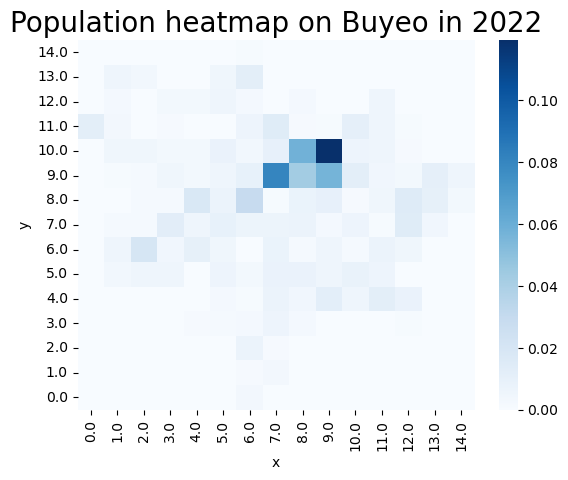

In [153]:
# 좌표별 인구수비율 그래프 표시
pop_rate_heatmap = df[df['연도'] == 2015].pivot('y', 'x', '인구수비율').sort_index(ascending=False).fillna(0)
ax = sns.heatmap(pop_rate_heatmap, cmap='Blues')
plt.title('Population heatmap on Buyeo in 2022', fontsize=20)
plt.show()

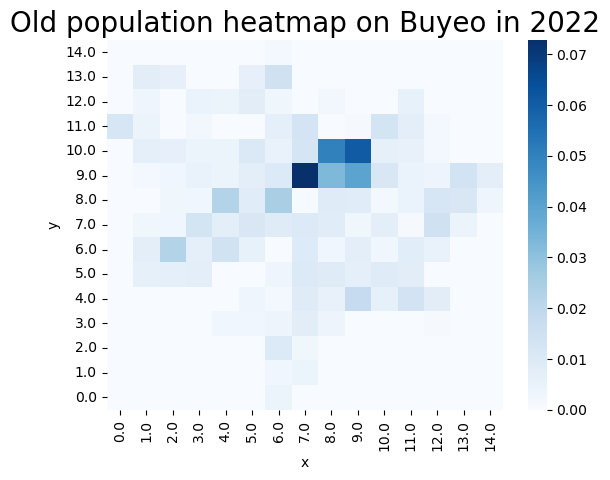

In [167]:
# 좌표별 60세이상노인인구수비율 그래프 표시
old_pop_rate_heatmap = df[df['연도'] == 2022].pivot('y', 'x', '60세이상노인인구수비율').sort_index(ascending=False).fillna(0)
ax = sns.heatmap(old_pop_rate_heatmap, cmap='Blues')
plt.title('Old population heatmap on Buyeo in 2022', fontsize=20)
plt.show()

In [168]:
# 전처리된 데이터프레임 저장
df.to_csv('./data/coorded_old_population.csv', encoding='utf-8-sig', index=False)